# Assignment 4

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

将其输入与之权重相乘再加上偏置，然后经过激活函数得到输出

####  2. Why we use non-linear activation funcitons in neural networks?

因为经过线性激活最后得到的输出仍是wx+b的形式，说明此时经过多个神经层输出与经过一个神经元输出没有区别，失去了深度的意义

#### 3. What is the 'Logistic Loss' ?

Logistic Loss是二分类问题的目标函数，是cross entropy Loss的一个特例，能够非常合理地反映预测概率与groundtruth之间的关系。

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

虽然ReLU和tanh都比sigmoid要好，但是二分类问题应该选择sigmoid，首先其导数是非零的，且很容易计算，能够将线性得到的输出映射在0-1范围内，很好地反映了概率的概念

#### 5. Why we don't use zero initialization for all parameters ?

如果W初始化为0则对于每个隐藏层对应的参数更新都是相同的，这样无论梯度下降多少次，这些神经元都是学习到相同的特征，失去了深度网络的意义。

#### 6. Can you implement the softmax function using python ? 

In [2]:
import numpy as np

def softmax(x: np.array):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [3]:
x = np.array([3.0, 6.0, 9.0, 2.0, 1.0])
softmax(x)

array([2.35284404e-03, 4.72581359e-02, 9.49205034e-01, 8.65562952e-04,
       3.18422815e-04])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignment will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [14]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [15]:
# Loading the data 
digits = datasets.load_digits()

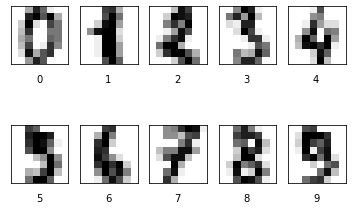

In [16]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [17]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [18]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](network.png)

In [ ]:
!pwd

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [6]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    return 1 / (1 + np.exp(-z))

In [7]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.2-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [8]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)*0.01
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [21]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data ,shape = [m, 64]
    Y - ground truth 
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)  #shape: (m, )
    A = A.reshape(1, -1)
    Y = Y.reshape(1, -1)
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    dw = 1/m * np.dot((A-Y), X).T
    db = 1/m * np.sum(A-Y)
        
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [25]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descent algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X.  The next is the predict() function.    
Two steps:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction.

In [11]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    #Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
    
    Y_prediction = sigmoid(np.dot(X, w) + b) 
    
    #for i in range(A.shape[i]):
    #    None 
    np.putmask(Y_prediction, Y_prediction<=0.5, 0)
    np.putmask(Y_prediction, Y_prediction>0.5, 1)
    
    Y_prediction = Y_prediction.reshape(1, -1)
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

##### 5- Merge all functions into a model

In [27]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train -- training set
    Y_train -- training label
    X_test -- test set
    Y_test -- test label
    num_iteration -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w, b, training_accuracy, test_accuracy, cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}
    
    w, b = initialize_parameters(X_train.shape[1])
    train_params, _, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    d['w'], d['b'] = train_params['w'], train_params['b']
    d['cost'] = costs
    
    Y_train_pred = predict(d['w'], d['b'], X_train)
    training_accuracy = np.sum(np.equal(Y_train.reshape(1, -1), Y_train_pred)) / Y_train_pred.shape[1]
    
    Y_test_pred = predict(d['w'], d['b'], X_test) 
    test_accuracy = np.sum(np.equal(Y_test.reshape(1, -1), Y_test_pred)) / Y_test_pred.shape[1]
    
    d['training_accuracy'], d['test_accuracy'] = training_accuracy, test_accuracy
    
    return d

In [28]:
model(X_train, y_train, X_test, y_test, 5000, 0.005, True)

Cost after iteration 0: 0.761213
Cost after iteration 100: 0.301918
Cost after iteration 200: 0.276268
Cost after iteration 300: 0.265070
Cost after iteration 400: 0.259081
Cost after iteration 500: 0.255501
Cost after iteration 600: 0.253197
Cost after iteration 700: 0.251632
Cost after iteration 800: 0.250523
Cost after iteration 900: 0.249708
Cost after iteration 1000: 0.249093
Cost after iteration 1100: 0.248615
Cost after iteration 1200: 0.248236
Cost after iteration 1300: 0.247929
Cost after iteration 1400: 0.247675
Cost after iteration 1500: 0.247463
Cost after iteration 1600: 0.247283
Cost after iteration 1700: 0.247128
Cost after iteration 1800: 0.246992
Cost after iteration 1900: 0.246873
Cost after iteration 2000: 0.246767
Cost after iteration 2100: 0.246673
Cost after iteration 2200: 0.246587
Cost after iteration 2300: 0.246509
Cost after iteration 2400: 0.246438
Cost after iteration 2500: 0.246373
Cost after iteration 2600: 0.246312
Cost after iteration 2700: 0.246256
Cost

{'w': array([[ 0.00836098],
        [-0.02568439],
        [ 0.01753356],
        [-0.00606235],
        [ 0.06989083],
        [ 0.11748416],
        [ 0.18351745],
        [-0.1035854 ],
        [ 0.05093728],
        [-0.20006695],
        [ 0.10993112],
        [ 0.08563277],
        [-0.00769564],
        [-0.0850005 ],
        [ 0.00066626],
        [ 0.06106399],
        [-0.00938725],
        [ 0.09471381],
        [ 0.1567891 ],
        [-0.04437946],
        [-0.24394778],
        [-0.04921727],
        [-0.0904726 ],
        [-0.10068125],
        [-0.02041347],
        [-0.21620479],
        [ 0.0360607 ],
        [ 0.17866811],
        [ 0.02077405],
        [ 0.1618084 ],
        [-0.15581743],
        [-0.02057889],
        [-0.00438649],
        [-0.26615087],
        [-0.00929898],
        [ 0.17312316],
        [-0.08103327],
        [-0.03790898],
        [ 0.10095234],
        [-0.01028514],
        [-0.02055309],
        [-0.04146974],
        [ 0.05590752],
      

##### 4.1 Observe the effect of learning rate on the leraning process.   

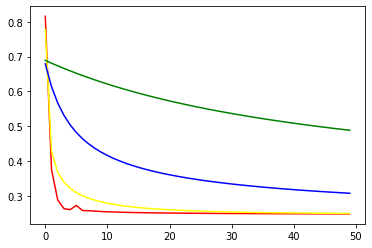

In [30]:
lrs = [1e-2, 1e-3, 1e-4, 1e-5]
colors = ['red', 'yellow', 'blue', 'green']
for lr, c in zip(lrs, colors):
    cost = model(X_train, y_train, X_test, y_test, 5000, lr, False)['cost']
    plt.plot(range(len(cost)), cost, color=c)

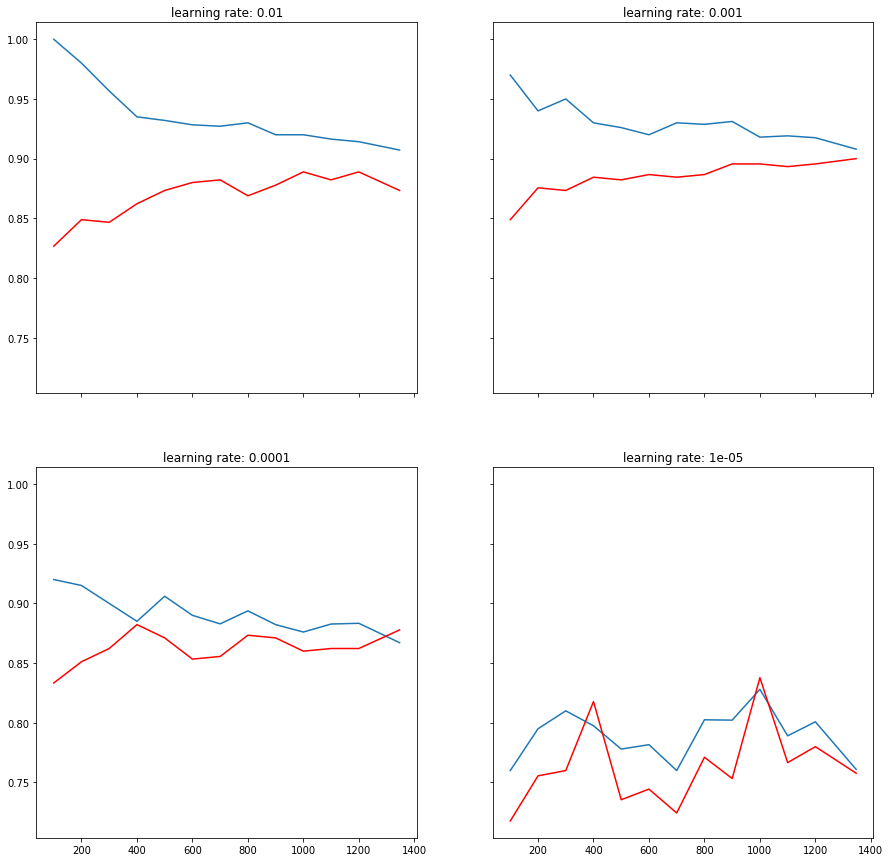

In [32]:
train_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1347]

lrs = [1e-2, 1e-3, 1e-4, 1e-5]

fig, ax = plt.subplots(figsize=(15, 15), nrows=2, ncols=2, sharey=True, sharex=True)
axes = ax.flatten()

for i, lr in enumerate(lrs):
    train_accuracy_list = []
    test_accuracy_list = []
    
    for size in train_size:
        d = model(X_train[:size, ], y_train[:size, ], X_test, y_test, 2000, lr, False)
        train_accuracy_list.append(d['training_accuracy'])
        test_accuracy_list.append(d['test_accuracy'])
        
    axes[i].set_title(f'learning rate: {lr}')
    axes[i].plot(train_size, train_accuracy_list)
    axes[i].plot(train_size, test_accuracy_list, color='red')

##### 4.2 Observe the effect of iteration_num on the test accuracy.

[0.856, 0.884, 0.896, 0.898, 0.9, 0.898, 0.896]


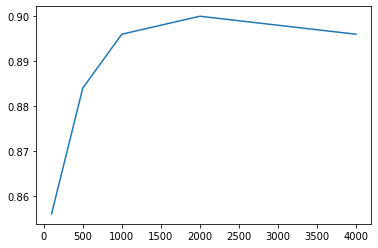

In [36]:
iteration_num_list = [100, 500, 1000, 1500, 2000, 3000, 4000]
test_accuracy_list = []
for iteration_num in iteration_num_list:
    d = model(X_train, y_train, X_test, y_test, iteration_num, 0.001, False)
    test_accuracy_list.append(round(d['test_accuracy'], 3))
print(test_accuracy_list)    
plt.plot(iteration_num_list, test_accuracy_list)

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

    把y = i 转化为独热编码，w.shape = [X.shape[1], 10]

In [37]:
def onehot_encode(x):
    onehot = []
    for i in x:
        encode = [0]*10
        encode[i] = 1
        onehot.append(encode)
    return np.array(onehot)

In [38]:
y_train_onehot = onehot_encode(y_train)
y_test_onehot = onehot_encode(y_test)

In [39]:
y_train_onehot.shape

(1347, 10)

#### 标签由1列变为10列，softmax函数要更改

In [67]:
def softmax10(x: np.array):
        x -= np.max(x, axis=1).reshape(-1, 1)
        return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

In [69]:
def propagate10(X, y, w, b):
    # z = wX + b
    # a = softmax(z)
    assert(X.shape[1] == w.shape[0])
    S = softmax10(np.dot(X, w) + b)
    assert(S.shape == y.shape)
    m = X.shape[0]
    # cost_func: L = -1/m * sum(y_i * log(S_i))
    cost = -1/m * np.sum(y * np.log(S))
    # partial
    dw = 1/m * np.dot(X.T, (S - y))
    db = 1/m * np.sum(S - y, axis=0).reshape(1, -1)
    assert(dw.shape == w.shape)
    assert(db.shape == b.shape)

    grads = {
        'dw': dw,
        'db': db
    }

    return grads, cost

In [70]:
def accuracy10(x, y, w, b):
    y_hat = softmax10(np.dot(x, w) + b)
    m = x.shape[0]
    cost = -1/m * np.sum(y * np.log(y_hat))
    y_predict = []
    for i in y_hat:
        y_onehot = [0]*10
        y_onehot[np.argmax(i)] = 1
        y_predict.append(y_onehot)
        
    y_predict = np.array(y_predict)
    diff = y - y_predict

    correct = 0
    total = len(diff)
    for i in diff:
        if (i == 0).all():
            correct += 1
    return correct / total, cost

In [45]:
from sklearn.utils import resample

def optimize10(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost):
    # initialize params
    w = np.random.randn(X_train.shape[1], 10) * 0.01
    b = np.random.randn(1, 10) * 0.01
    accuracy_cost = {
        'train_cost': [],
        'train_acc': [],
        'test_cost': [],
        'test_acc': []
    }
    
    batch_size = 100
    steps = X_train.shape[0] // batch_size
    for i in range(num_iterations):
        cost = 0
        for j in range(steps):
            X_batch, y_batch = resample(X_train, y_train, n_samples=batch_size)
            grads, batch_cost = propagate10(X_batch, y_batch, w, b)

            dw = grads['dw']
            db = grads['db']

            w -= learning_rate * dw
            b -= learning_rate * db

            cost += batch_cost
            
        if i % 100 == 0:
            train_acc, train_cost = accuracy10(X_train, y_train, w, b)
            test_acc, test_cost = accuracy10(X_test, y_test, w, b)
            accuracy_cost['train_acc'].append(train_acc)
            accuracy_cost['train_cost'].append(train_cost)
            accuracy_cost['test_cost'].append(test_cost)
            accuracy_cost['test_acc'].append(test_acc)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost / steps))

    params = {
        'w': w,
        'b': b
    }
    grads = {
        'dw': dw,
        'db': b
    }
    return params, grads, accuracy_cost

In [71]:
def predict10(x, y, w, b):
        plt.imshow(x.reshape([8,8]), cmap=plt.cm.gray_r)
        y_predict = softmax10(np.dot(x, w) + b)
        y_predict = np.argmax(y_predict)
        print(f'The predict value is {y_predict}, the real digit is {y}')

In [47]:
def model10(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost=True):
    params, _, acc_cost = optimize10(X_train, y_train, X_test, y_test, 
                                         num_iterations, learning_rate, print_cost)
    result = {
        'w': params['w'],
        'b': params['b'],
        'accuracy_cost': acc_cost
    }
    
    return result

In [72]:
result = model10(X_train, y_train_onehot, X_test, y_test_onehot, 5000, 0.001)

Cost after iteration 0: 0.921850
Cost after iteration 100: 0.251146
Cost after iteration 200: 0.232241
Cost after iteration 300: 0.216029
Cost after iteration 400: 0.231569
Cost after iteration 500: 0.263755
Cost after iteration 600: 0.244165
Cost after iteration 700: 0.248185
Cost after iteration 800: 0.288894
Cost after iteration 900: 0.282393
Cost after iteration 1000: 0.245886
Cost after iteration 1100: 0.271118
Cost after iteration 1200: 0.241329
Cost after iteration 1300: 0.271593
Cost after iteration 1400: 0.263126
Cost after iteration 1500: 0.261919
Cost after iteration 1600: 0.241337
Cost after iteration 1700: 0.239949
Cost after iteration 1800: 0.236382
Cost after iteration 1900: 0.247876
Cost after iteration 2000: 0.256254
Cost after iteration 2100: 0.235279
Cost after iteration 2200: 0.275163
Cost after iteration 2300: 0.235217
Cost after iteration 2400: 0.233187
Cost after iteration 2500: 0.259097
Cost after iteration 2600: 0.240423
Cost after iteration 2700: 0.227136
Cost

In [73]:
result

{'w': array([[ 3.44176597e-03,  1.04707328e-04, -3.31936955e-03,
         -2.24261125e-04,  7.92174173e-03, -8.73142876e-04,
         -6.21226133e-03,  3.92418917e-03,  1.84697469e-04,
          2.00114478e-02],
        [ 1.55346470e-02, -7.87120530e-03,  1.53700971e-02,
         -1.67780886e-02,  1.73531585e-02,  8.67790116e-04,
          6.96987668e-03, -1.01191206e-03, -3.06135146e-04,
          1.35652042e-02],
        [ 1.25149653e-02,  3.15077556e-02, -4.01371725e-04,
         -8.77752349e-03,  8.24005842e-03, -4.56213413e-04,
          1.15417043e-02, -7.12465383e-03,  9.07093079e-03,
         -1.80235948e-02],
        [ 5.09870390e-02,  3.98337539e-02, -1.85505655e-02,
         -1.87278558e-02, -7.88427288e-03, -1.00219325e-02,
         -1.71849846e-02,  1.83116224e-02,  1.55704765e-02,
         -5.52243939e-03],
        [ 6.74734107e-03,  7.82403782e-02, -3.53648918e-03,
         -9.82012952e-03, -2.88035462e-02, -7.90619400e-03,
         -1.36051705e-02, -1.97262607e-02, -1.2

The predict value is 0, the real digit is [1 0 0 0 0 0 0 0 0 0]


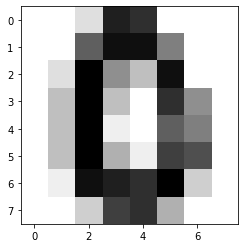

In [74]:
predict10(X_test[27], y_test_onehot[27], result['w'], result['b'])